## Just historic data for plotting. Not a good way of visualizing the data

C:\Users\sinbek\AppData\Local\Temp\ipykernel_2220\1466616482.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


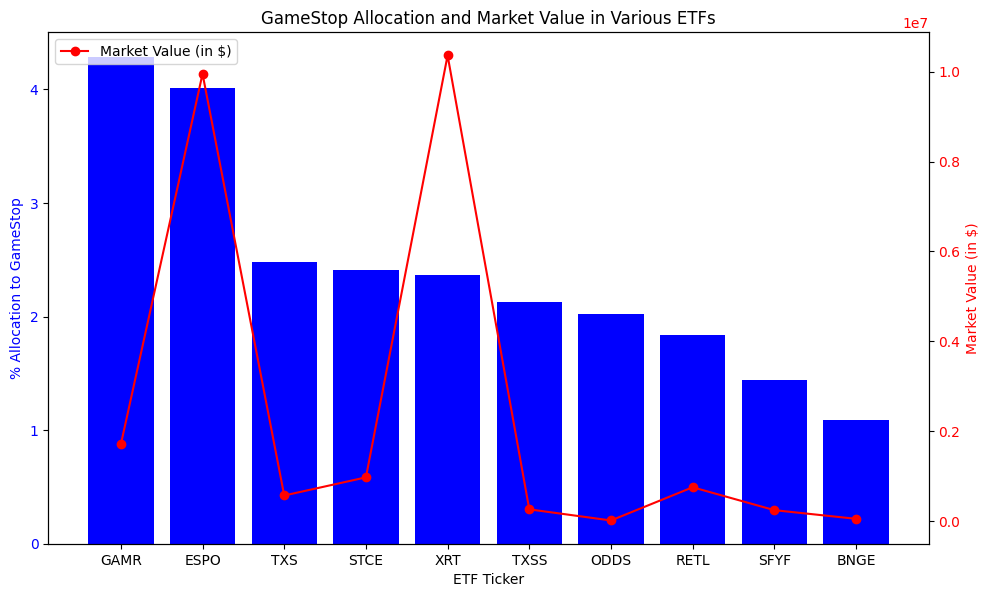

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data
data = {
    'Ticker': ['GAMR', 'ESPO', 'TXS', 'STCE', 'XRT', 'TXSS', 'ODDS', 'RETL', 'SFYF', 'BNGE'],
    'Fund Name': [
        'Amplify Video Game Tech ETF', 'VanEck Video Gaming and eSports ETF', 
        'Texas Capital Texas Equity Index ETF', 'Schwab Crypto Thematic ETF', 
        'SPDR S&P Retail ETF', 'Texas Capital Texas Small Cap Equity Index ETF', 
        'Pacer BlueStar Digital Entertainment ETF', 'Direxion Daily Retail Bull 3X Shares', 
        'SoFi Social 50 ETF', 'First Trust S-Network Streaming & Gaming ETF'
    ],
    'Segment': [
        'Equity: Global Video Games & eSports', 'Equity: Global Video Games & eSports', 
        'Equity: U.S. - Total Market', 'Equity: Global Digital Economy', 
        'Equity: U.S. Broadline Retail', 'Equity: U.S. - Small Cap', 
        'Equity: Global Video Games & eSports', 'Leveraged Equity: U.S. Broadline Retail', 
        'Equity: U.S. - Total Market', 'Equity: Global Video Games & eSports'
    ],
    '% Allocation': [4.29, 4.01, 2.48, 2.41, 2.37, 2.13, 2.02, 1.84, 1.44, 1.09],
    'Market Value': [1.71, 9.95, 0.573, 0.976, 10.36, 0.265, 0.0176, 0.756, 0.247, 0.0542],  # These values are in millions
    'Number of Shares': [69120, 402670, 23210, 38710, 419340, 10710, 714, 30630, 10020, 2190]
}

df = pd.DataFrame(data)

# Convert 'Market Value' to actual dollar amounts for clarity
df['Market Value'] = df['Market Value'] * 1_000_000  # Assuming the values were intended to be in millions

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for percentage allocation
ax1.bar(df['Ticker'], df['% Allocation'], color='b', label='% Allocation')
ax1.set_xlabel('ETF Ticker')
ax1.set_ylabel('% Allocation to GameStop', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for market value
ax2 = ax1.twinx()
ax2.plot(df['Ticker'], df['Market Value'], color='r', label='Market Value (in $)', marker='o')
ax2.set_ylabel('Market Value (in $)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Ensure labels and title are properly displayed
fig.tight_layout()
plt.title('GameStop Allocation and Market Value in Various ETFs')
plt.legend(loc='upper left')
plt.show()

## Code for comparing volume over the last 18 months

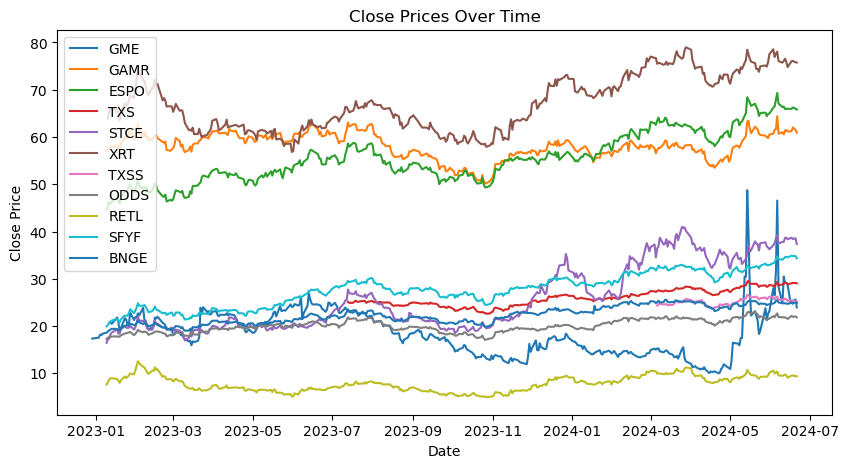

In [20]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt

api_key = 'd8d5115388fd4696b93b2d271b04fbd5'

def fetch_data(symbol):
    url = f"https://api.twelvedata.com/time_series?symbol={symbol}&interval=1day&outputsize=365&apikey={api_key}"
    response = requests.get(url).json()
    if 'values' in response:
        return pd.DataFrame(response['values']).assign(symbol=symbol)
    else:
        raise ValueError(f"Failed to fetch data for {symbol}: {response.get('message', 'No error message')}")

symbols = ['GME', 'GAMR', 'ESPO', 'TXS', 'STCE', 'XRT', 'TXSS', 'ODDS', 'RETL', 'SFYF', 'BNGE']

frames = []
for symbol in symbols:
    try:
        frame = fetch_data(symbol)
        frames.append(frame)
        time.sleep(8)  # Wait for 8 seconds before making the next API call. Limited by number of credits
    except ValueError as e:
        print(e)

df = pd.concat(frames)

# Convert 'datetime' to pandas datetime and set as index
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df['close'] = pd.to_numeric(df['close'], errors='coerce')

# Plotting
plt.figure(figsize=(10, 5))
for symbol in df['symbol'].unique():
    subset = df[df['symbol'] == symbol]
    # Convert index and 'close' to numpy array
    dates = subset.index.to_pydatetime()  # Ensure dates are in datetime format that Matplotlib can handle
    closes = subset['close'].to_numpy()  # Ensure close prices are in numpy array format
    plt.plot(dates, closes, label=symbol)

plt.legend()
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


## Assuming data is already loaded from last code
## We will plot the volume of ETF's vs share price

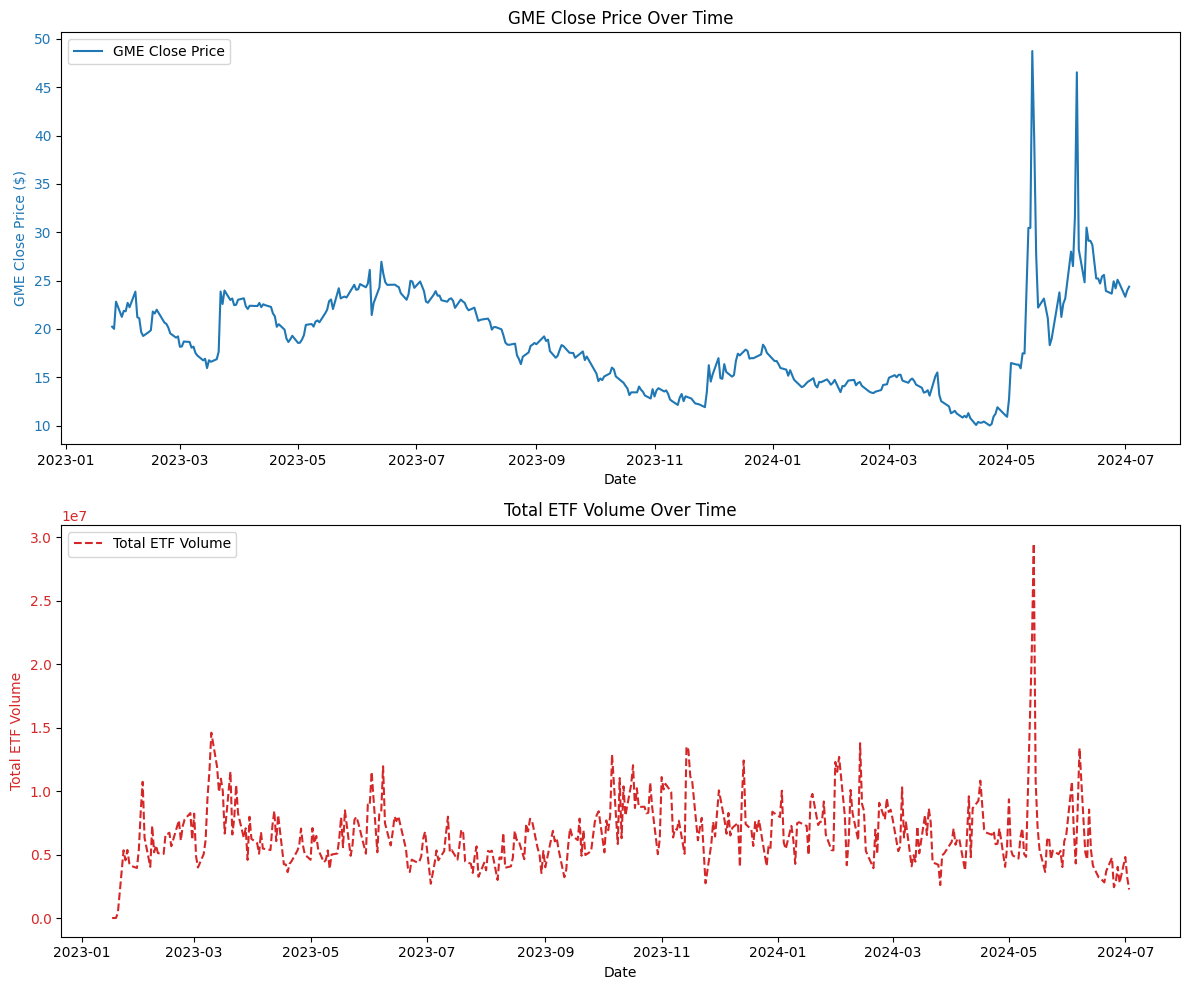

In [2]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt

api_key = 'd8d5115388fd4696b93b2d271b04fbd5'

def fetch_data(symbol):
    url = f"https://api.twelvedata.com/time_series?symbol={symbol}&interval=1day&outputsize=365&apikey={api_key}"
    response = requests.get(url).json()
    if 'values' in response:
        # Ensure the 'datetime' is included and correctly named
        data = pd.DataFrame(response['values'])
        data['datetime'] = pd.to_datetime(data['datetime'])  # Convert here
        data['close'] = pd.to_numeric(data['close'], errors='coerce')
        data['volume'] = pd.to_numeric(data['volume'], errors='coerce')
        return data.assign(symbol=symbol)
    else:
        raise ValueError(f"Failed to fetch data for {symbol}: {response.get('message', 'No error message')}")

symbols = ['GME', 'GAMR', 'ESPO', 'TXS', 'STCE', 'XRT', 'TXSS', 'ODDS', 'RETL', 'SFYF', 'BNGE']

frames = []
for symbol in symbols:
    try:
        frame = fetch_data(symbol)
        frames.append(frame)
        time.sleep(8)  # Sleep to avoid hitting API rate limits
    except ValueError as e:
        print(e)

df = pd.concat(frames, ignore_index=True)
df.set_index('datetime', inplace=True)

# Separate GME data from ETF data
gme_data = df[df['symbol'] == 'GME']
etf_data = df[df['symbol'] != 'GME']

# Aggregate ETF volumes by date
etf_volume_sum = etf_data.groupby(etf_data.index).sum()['volume']

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot GME closing prices on the first subplot
ax1.set_xlabel('Date')
ax1.set_ylabel('GME Close Price ($)', color='tab:blue')
ax1.plot(gme_data.index, gme_data['close'], color='tab:blue', label='GME Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')
ax1.set_title('GME Close Price Over Time')

# Plot total ETF volume on the second subplot
ax2.set_xlabel('Date')
ax2.set_ylabel('Total ETF Volume', color='tab:red')
ax2.plot(etf_volume_sum.index, etf_volume_sum, color='tab:red', linestyle='--', label='Total ETF Volume')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper left')
ax2.set_title('Total ETF Volume Over Time')

plt.tight_layout()
plt.show()


## Trying to consume FTD - data from the SEC's website

In [7]:
import requests
import zipfile
import io
import pandas as pd
import matplotlib.pyplot as plt

# Function to download and unzip the file
def download_and_unzip(url, extract_to='.'):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = requests.get(url, headers=headers)
    if response.status_code == 200 and 'application/zip' in response.headers.get('Content-Type', ''):
        with zipfile.ZipFile(io.BytesIO(response.content)) as z:
            z.extractall(extract_to)
            return z.namelist()
    else:
        print(f"Failed to download file. Status code: {response.status_code}, Content-Type: {response.headers.get('Content-Type', '')}")
        raise ValueError(f"Failed to download file from {url}")

# Function to read the FTD data into a DataFrame
def read_ftd_data(file_path):
    df = pd.read_csv(file_path, delimiter='|', parse_dates=['SETTLEMENT DATE'])
    return df

# URL of the ZIP file from the SEC's website
url = "https://www.sec.gov/files/data/fails-deliver-data/cnsfails202406a.zip"

try:
    # Download and unzip the file
    file_list = download_and_unzip(url)

    # Assuming there's only one file in the ZIP, read it into a DataFrame
    ftd_file = file_list[0]
    ftd_data = read_ftd_data(ftd_file)

    # Filter the data for a specific ticker, e.g., GME
    gme_ftd_data = ftd_data[ftd_data['SYMBOL'] == 'GME']

    # Plot the FTD data
    plt.figure(figsize=(12, 6))
    plt.plot(gme_ftd_data['SETTLEMENT DATE'], gme_ftd_data['QUANTITY (FAILS)'], marker='o', linestyle='-')
    plt.xlabel('Date')
    plt.ylabel('FTD Quantity')
    plt.title('GME Fails-to-Deliver (FTD) Data')
    plt.grid(True)
    plt.show()

except ValueError as e:
    print(e)


Failed to download file. Status code: 403, Content-Type: text/html
Failed to download file from https://www.sec.gov/files/data/fails-deliver-data/cnsfails202406a.zip
